In [1]:
import numpy as np

from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

from pylab import rcParams



# 2. Feature importance

In [3]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify = cancer.target, random_state = 0)

## 2.1. Feature importance for Decision Tree

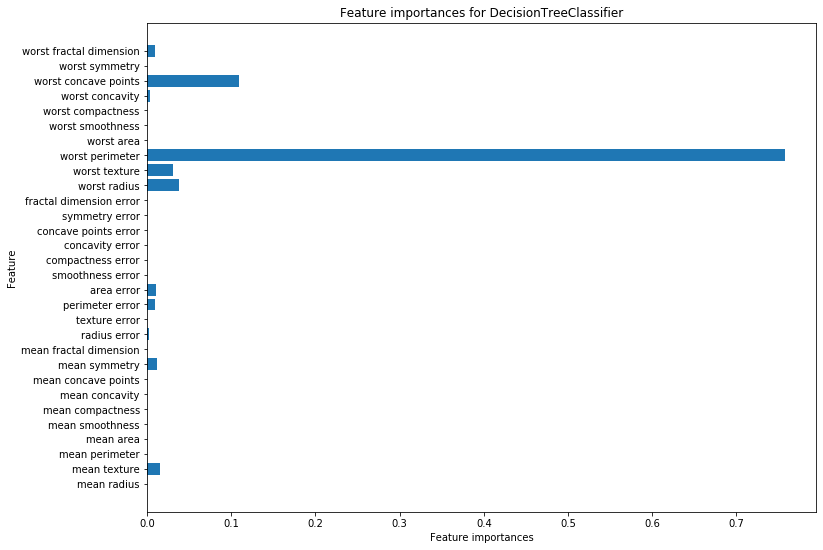

In [4]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

rcParams['figure.figsize'] = 12, 9    
n_reatures = cancer.data.shape[1]
plt.barh(range(n_reatures), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_reatures), cancer.feature_names)
plt.xlabel('Feature importances')
plt.ylabel('Feature')
plt.title("Feature importances for DecisionTreeClassifier")
plt.show()

In [5]:
top_features_dt = ['worst concave points','worst perimeter','worst texture', 'worst radius','mean texture']

## 2.2. Feature importance for Logistic Regression

### 2.2.1. Feature importance for Logistic Regression with using the coefficient value from cost function equation (without using sklearn methods)

Top features ['mean radius' 'mean texture' 'mean perimeter' 'texture error'
 'perimeter error' 'worst radius']


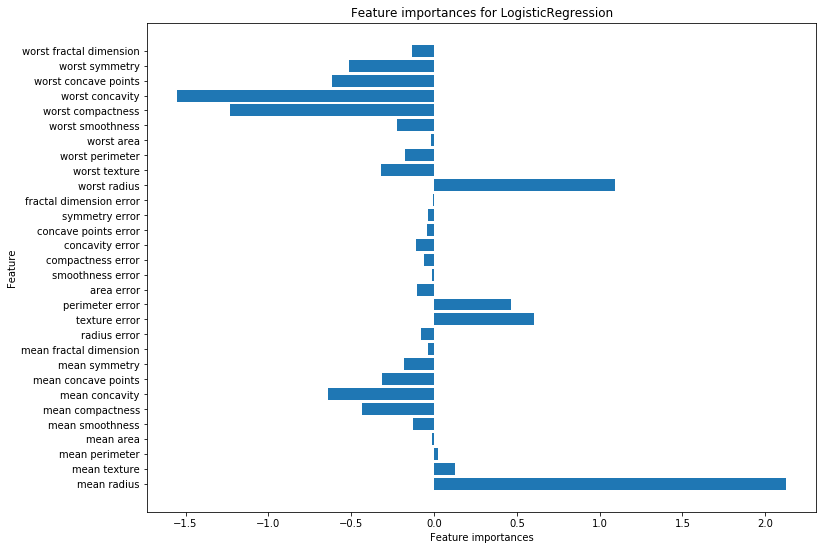

In [6]:
log_reg = LogisticRegression(fit_intercept = False, max_iter= 1000)
log_reg.fit(X_train,y_train)

# The higher the coefficient, the higher the “importance” of a feature.

top_features_coeff = cancer.feature_names[log_reg.coef_.reshape(n_reatures)>0]
print("Top features", top_features_coeff)
n_reatures = cancer.data.shape[1]
plt.barh(range(n_reatures), log_reg.coef_.reshape(n_reatures), align='center')
plt.yticks(np.arange(n_reatures), cancer.feature_names)
plt.xlabel('Feature importances')
plt.ylabel('Feature')
plt.title("Feature importances for LogisticRegression")
plt.show()

### 2.2.2. Feature importance for Logistic Regression with Recursive Feature Elimination (RFE)

In [7]:
from sklearn.feature_selection import RFE

# the 5 most informative features 
selector = RFE(log_reg, 5,step=1)
selector.fit(X_train,y_train)
top_features_rfe = cancer.feature_names[selector.ranking_ == 1]
print("Top 5 features",top_features_rfe)

Top 5 features ['mean concavity' 'mean concave points' 'mean symmetry' 'worst concavity'
 'worst concave points']


### 2.2.3. Feature importance for Logistic Regression with selecting features based on importance weights (with using sklearn method)

In [8]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(log_reg, threshold=-np.inf, max_features=5)
sfm.fit(X_train,y_train)
index = sfm.get_support()
top_features_sfm = cancer.feature_names[index]
print("Top 5 features", top_features_sfm)

Top 5 features ['mean radius' 'mean concavity' 'worst radius' 'worst compactness'
 'worst concavity']


## 2.3. Results for the feature importance 

In [11]:
import pandas as pd
from sklearn.metrics import roc_auc_score
data = pd.DataFrame(cancer.data, columns=[cancer.feature_names])
X_coeff = np.array(data[top_features_coeff].values)
X_rfe = np.array(data[top_features_rfe].values)
X_sfm = np.array(data[top_features_sfm].values)
X_dt = np.array(data[top_features_dt].values)


X_train_coeff, X_test_coeff, y_train_coeff, y_test_coeff = train_test_split(X_coeff, cancer.target, 
                                                    stratify = cancer.target, random_state = 0)

X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(X_rfe, cancer.target, 
                                                    stratify = cancer.target, random_state = 0)

X_train_sfm, X_test_sfm, y_train_sfm, y_test_sfm = train_test_split(X_sfm, cancer.target, 
                                                    stratify = cancer.target, random_state = 0)

X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X_dt, cancer.target, 
                                                    stratify = cancer.target, random_state = 0)
print('LogisticRegression')
log_reg.fit(X_train,y_train)
print("Original Logistic Regression: number of features {}, auc = {:.4f}".format(X_train.shape[1], 
                                                   roc_auc_score(y_test, log_reg.decision_function(X_test))))
log_reg.fit(X_train_coeff,y_train_coeff)
print("Coefficient Ranking Method: number of features {}, auc = {:.4f}".format(X_train_coeff.shape[1], 
                                                   roc_auc_score(y_test_coeff, log_reg.decision_function(X_test_coeff))))
log_reg.fit(X_train_rfe,y_train_rfe)
print("RFE: number of features {}, auc = {:.4f}".format(X_train_rfe.shape[1], 
                                                   roc_auc_score(y_test_rfe, log_reg.decision_function(X_test_rfe))))
log_reg.fit(X_train_sfm,y_train_sfm)
print("SFM: number of features {}, auc = {:.4f}".format(X_train_rfe.shape[1], 
                                                   roc_auc_score(y_test_sfm, log_reg.decision_function(X_test_sfm))))
print()
print('DecisionTreeClassifier')
tree.fit(X_train,y_train)
print("Original DecisionTreeClassifier: number of features {}, auc = {:.4f}".format(X_train.shape[1], 
                                                   roc_auc_score(y_test, tree.predict_proba(X_test)[:,1])))
tree.fit(X_train_dt,y_train_dt)
print("DecisionTreeClassifier feature_importances_: number of features {}, auc = {:.4f}".format(X_train_dt.shape[1], 
                                                   roc_auc_score(y_test_dt, tree.predict_proba(X_test_dt)[:,1])))

LogisticRegression
Original Logistic Regression: number of features 30, auc = 0.9925
Coefficient Ranking Method: number of features 6, auc = 0.9396
RFE: number of features 5, auc = 0.9006
SFM: number of features 5, auc = 0.9396

DecisionTreeClassifier
Original DecisionTreeClassifier: number of features 30, auc = 0.9299
DecisionTreeClassifier feature_importances_: number of features 5, auc = 0.9520
